In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


PENGOLAHAN DATAFRAME

In [4]:
#hapus kolom yang tidak ada kaitannya dengan klasifikasi kasus ini
df = df.drop(columns='Id')

In [5]:
#one hot encoding untuk label kategorikal
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
#gabungkan kolom category dan menghapus kolom spesies
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


PENGOLAHAN ARRAY

In [8]:
#konversi numpy array ke dataframe dengan fungsi values
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [9]:
#memisahkan atribut dan label
#pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4] #bagian sebelum koma untuk baris, setelah koma untuk kolom
#pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [10]:
#normalisasi untuk agar dapat dipelajari jst
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [11]:
#splitting data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

In [13]:
#arsitektur jst dengan 3 layers
#activation function terakhir adalah softmax (umum digunakan klasifikasi multi kelas)
model = Sequential ([
                     Dense(64, activation='relu', input_shape=(4,)),
                     Dense(64, activation='relu'),
                     Dense(3, activation='softmax')
])

In [14]:
#optimize dan loss function dari model
model.compile(optimizer='Adam', #pilih Adam sebagai optimizer
              loss='categorical_crossentropy', #karena multi kelas maka gunakan categorical_crossentropy
              metrics=['accuracy'])

In [15]:
#fungsi fit tampung ke objek hist
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.0769 - accuracy: 0.3524
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0399 - accuracy: 0.4286
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0068 - accuracy: 0.4857
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9781 - accuracy: 0.6381
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9511 - accuracy: 0.6476
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9251 - accuracy: 0.6476
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8969 - accuracy: 0.6476
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8679 - accuracy: 0.6476
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8394 - accuracy: 0.6476
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8076 - accuracy: 0.6476
Epoch 11/100
4/4 [===========

In [18]:
model.evaluate(X_test, y_test)
#elemen pertama adalah loss dan elemen kedua adalah akurasi

2/2 [==============================] - 0s 6ms/step - loss: 0.0932 - accuracy: 0.9556


[0.09322376549243927, 0.9555555582046509]

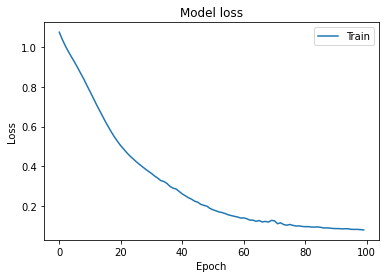

In [19]:
#membuat plot akurasi dan loss model pada proses pelatihan/training
import matplotlib.pyplot as plt
#objek hist menampung akurasi dan loss model tiap epochs pada proses training
#panggil fungsi history pada objek hist. pilih metrik loss
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

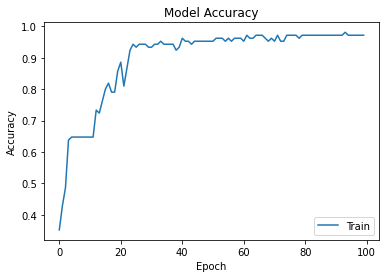

In [22]:
#membuat plot akurasi
plt.plot(hist.history['accuracy']) #pilih metrik accuracy dari objek hist dan fungsi history
plt.title('Model Accuracy') #judul plot
plt.ylabel('Accuracy') #label sumbu y
plt.xlabel('Epoch') #label sumbu x 
plt.legend(['Train'], loc='lower right') #legend
plt.show() #tampilkan hasil plot

LEARNING HOW TO USE CALLBACK TO DO AN EFFECTIVE TRAINING

In [26]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): #kelas inherit callback
  def on_epoch_end(self, epoch, logs={}): #fungsi on_epoch_end memberitahu model berhenti training
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True #menghentikan training
callbacks = myCallback()

In [28]:
model.fit(X_train, y_train, epochs=50, callbacks=[callbacks]) #tambah parameter dan objek callbacks

Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0773 - accuracy: 0.9714

Akurasi telah mencapai >90%!
